In [5]:
import requests

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
open_meteo_url = "https://historical-forecast-api.open-meteo.com/v1/forecast"

In [11]:
params = {    
    "latitude": -23.5505,  # Latitude de São Paulo, por exemplo
    "longitude": -46.6333,  # Longitude de São Paulo
	"start_date": "2025-03-25",
	"end_date": "2025-03-25",
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "visibility", "surface_pressure", "pressure_msl", "wind_speed_10m", "soil_temperature_0cm", "weather_code"]
    }

In [12]:
response = requests.get(open_meteo_url, params=params)

In [13]:
weather_data = response.json()

In [14]:
weather_df = pd.DataFrame({key: value for key, value in weather_data["hourly"]. items()})

In [15]:
weather_df["time"] = pd.to_datetime(weather_df["time"])

In [16]:
print(weather_df)

                  time  temperature_2m  ...  soil_temperature_0cm  weather_code
0  2025-03-25 00:00:00            22.7  ...                  22.2             2
1  2025-03-25 01:00:00            22.2  ...                  21.9             2
2  2025-03-25 02:00:00            21.8  ...                  21.5             2
3  2025-03-25 03:00:00            21.4  ...                  20.9             2
4  2025-03-25 04:00:00            20.9  ...                  20.5             2
5  2025-03-25 05:00:00            20.3  ...                  20.3             2
6  2025-03-25 06:00:00            20.4  ...                  20.6             2
7  2025-03-25 07:00:00            20.3  ...                  20.4             2
8  2025-03-25 08:00:00            20.2  ...                  20.2             2
9  2025-03-25 09:00:00            20.1  ...                  20.0             2
10 2025-03-25 10:00:00            20.2  ...                  21.1             2
11 2025-03-25 11:00:00            22.4  

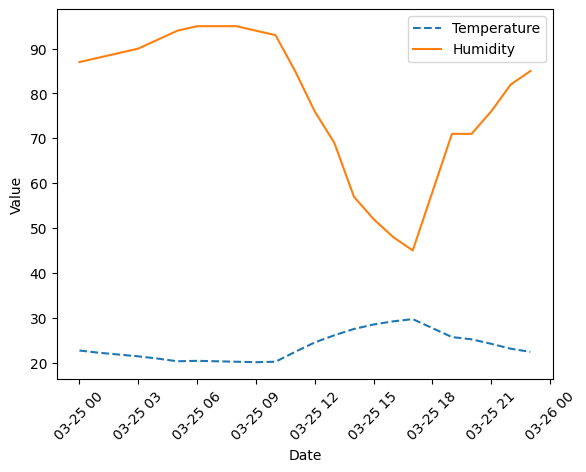

In [17]:
plt.plot(weather_df["time"], weather_df["temperature_2m"], label="Temperature", linestyle="--")	
plt.plot(weather_df["time"], weather_df["relative_humidity_2m"], label = "Humidity")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [18]:
correl = weather_df["temperature_2m"].corr(weather_df["relative_humidity_2m"])

In [19]:
print(f"Correlation between temperature and humidity: {correl:.2f}")

Correlation between temperature and humidity: -0.99


In [21]:
x = weather_df[['relative_humidity_2m']].values
y = weather_df['temperature_2m'].values

In [23]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

Intercept: 38.77
Coefficient: -0.19


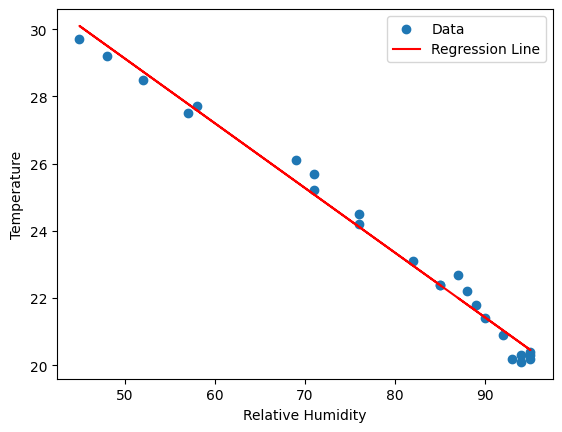

In [26]:
y_pred = model.predict(x)
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Relative Humidity')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [34]:
temperature = model.coef_[0]*weather_df["relative_humidity_2m"] + model.intercept_

In [43]:
draft = model.coef_[0]*weather_df["relative_humidity_2m"]

In [35]:
print(temperature)

0     21.997832
1     21.805036
2     21.612240
3     21.419444
4     21.033852
5     20.648260
6     20.455463
7     20.455463
8     20.455463
9     20.648260
10    20.841056
11    22.383425
12    24.118590
13    25.468163
14    27.781716
15    28.745697
16    29.516881
17    30.095270
18    27.588920
19    25.082570
20    25.082570
21    24.118590
22    22.961813
23    22.383425
Name: relative_humidity_2m, dtype: float64


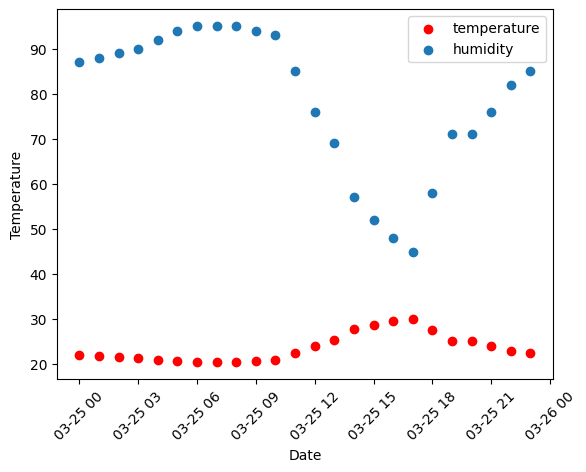

In [ ]:
plt.scatter(weather_df["time"], temperature, label='temperature_forecast', color='red')
plt.scatter(weather_df["time"], weather_df["relative_humidity_2m"], label='humidity')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [2]:
import folium